In [39]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [40]:
import numpy as np
import pandas as pd

In [41]:
# Loading and reading data set
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")
#df.head()
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
# dropping last 3 columns as not wanted
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#df.sample(5)

In [43]:
# Renaming the cols
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace=True)
#df.info()

In [44]:
# for labeling the target in 0 & 1 instead of ham & spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
#df.sample(6)

In [45]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [46]:
# checking duplicated values
df.duplicated().sum()
# Removing duplicated Values
df = df.drop_duplicates(keep='first')

Exploratory Data Analysis (EDA)

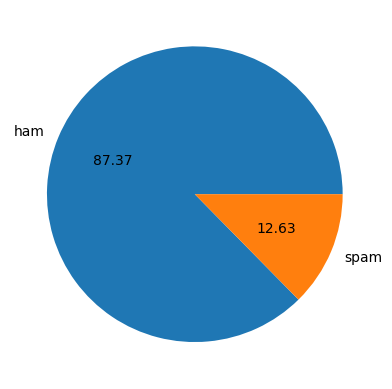

In [47]:
# Checking total no of spam and ham in dataset
#df['target'].value_counts()

# plotting pie plot of spam and ham
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [48]:
# using nltk
import nltk
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
nltk.download("puntk_tab")
# number of character in text
df['num_characters'] = df['text'].apply(len)

# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# number of words
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

# describe 3 columns
#df[['num_characters','num_words','num_sentence']].describe()

[nltk_data] Error loading puntk_tab: Package 'puntk_tab' not found in
[nltk_data]     index


In [49]:
# Describing ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

# Describing ham
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


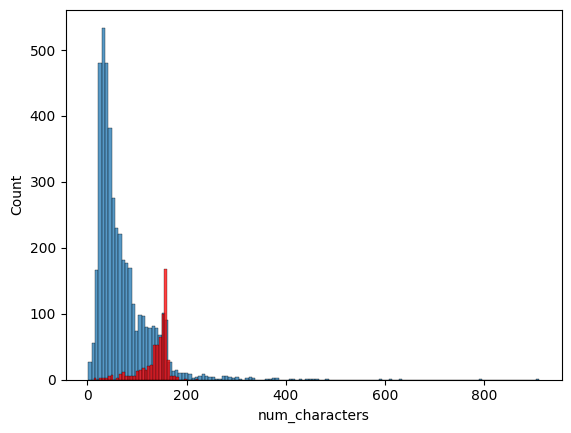

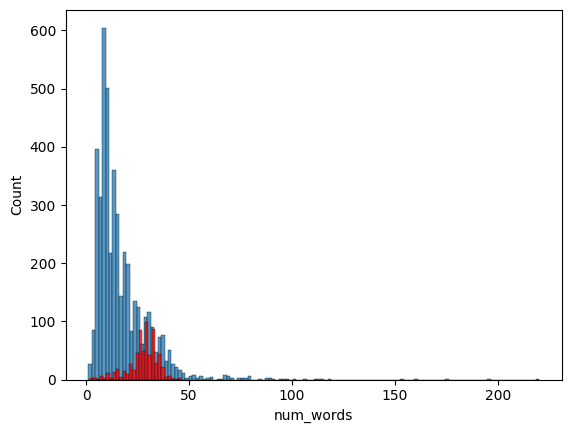

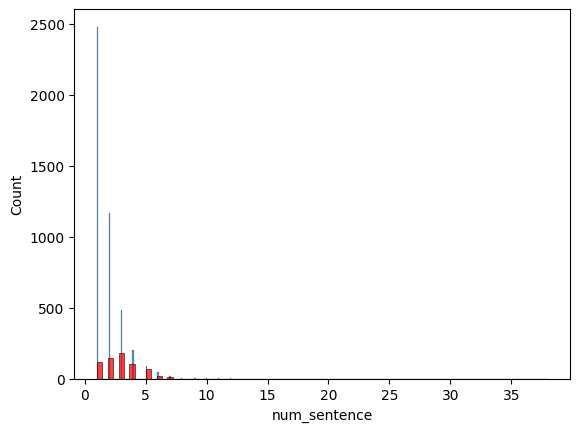

In [50]:
# Plotting Histogram for ham and span in number of characters
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

# Plotting Histogram for ham and span in number of words
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()
# Plotting Histogram for ham and span in number of sentence
import seaborn as sns
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')
plt.show()

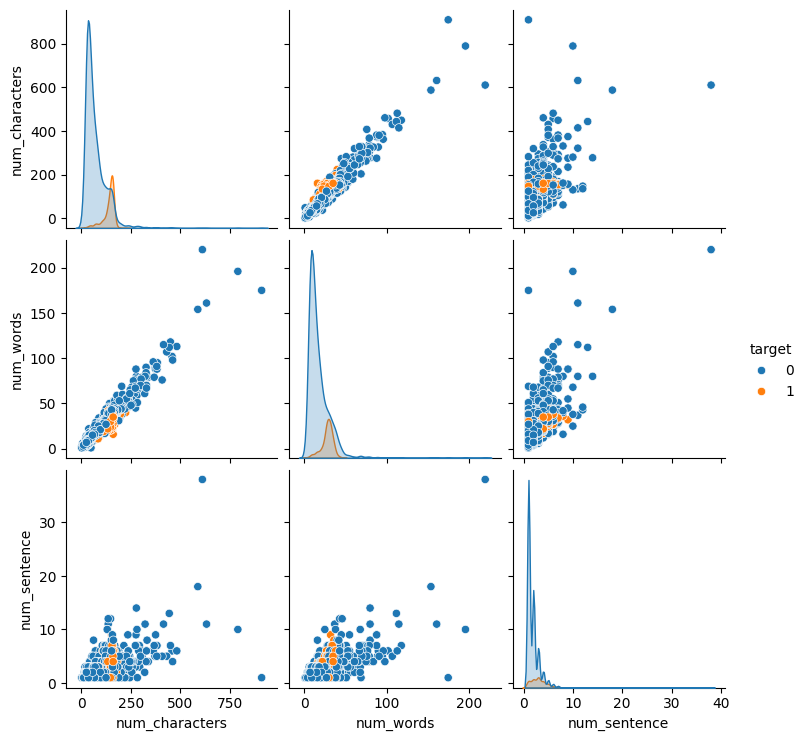

In [51]:
# Plotting pairplot
sns.pairplot(df,hue='target')
plt.show()

In [ ]:
# # Plotting heatmap
# sns.heatmap(df.corr(),annot=True)
# plt.show()

Data Preprocessing
+ Lower case
+ Tokenization
+ Removing special character
+ Removing stop words and punctuation
+ Stemming

In [54]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

nltk.download('stopwords') # ('all')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [55]:
# Data preprocessing Function
def transf_text(text):
    text =  text.lower()     # Lower-case
    text = nltk.word_tokenize(text)   # Tokenizattion

    y = []
    for i in text:          # Removing special character
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:       # Removing stop words and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:      # Stemming
        y.append(ps.stem(i))
    return " ".join(y)

# checking function
#transf_text('I Loved the Youtube Lecture on Machine Learning. how about you')

# Adding transformed text in dataframe
df['transformed_text'] = df['text'].apply(transf_text)

In [ ]:
!pip install wordcloud

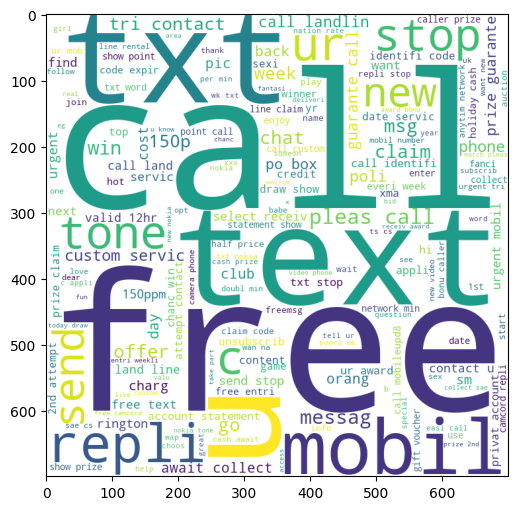

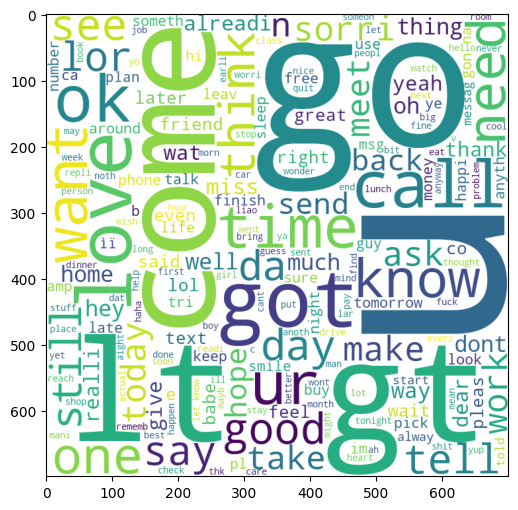

In [58]:
# Generating WordCloud
#! python -m pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

# wordcloud for spam
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

# wordcloud for ham
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

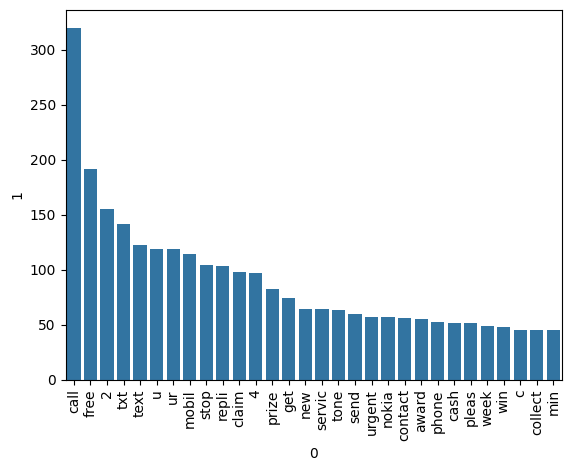

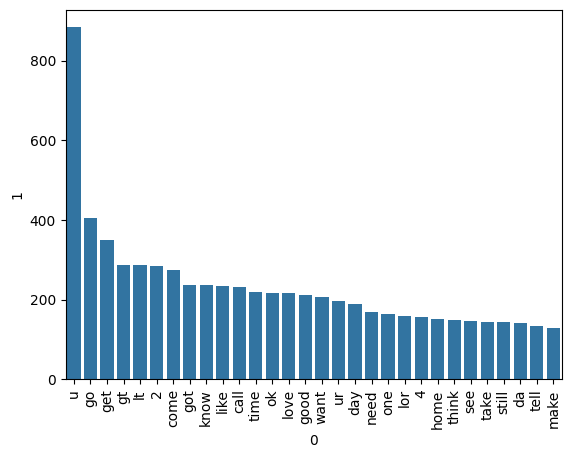

In [59]:
# top 30 word used in spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
sns.barplot(x=(pd.DataFrame(Counter(spam_corpus).most_common(30)))[0],y=(pd.DataFrame(Counter(spam_corpus).most_common(30)))[1])
plt.xticks(rotation='vertical')
plt.show()

# top 30 word used in ham
spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

sns.barplot(x=(pd.DataFrame(Counter(spam_corpus).most_common(30)))[0],y=(pd.DataFrame(Counter(spam_corpus).most_common(30)))[1])
plt.xticks(rotation='vertical')
plt.show()

Model building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
#cv = CountVectorizer()

X = tfidf.fit_transform(df['transformed_text']).toarray()
#X.shape

y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()

In [63]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [64]:
b = 'i am free today,lets go for a movie.what do you say?'
a ='congratulations you won 1000 call on this number to get your prize'
transformed_sms = transf_text(b)
print(transformed_sms)
# 2. vectorize
vector_input = tfidf.transform([transformed_sms])
print(vector_input)
#3. predict
result = mnb.predict(vector_input)[0]
print(result)

free today let go say
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 3000)>
  Coords	Values
  (0, 1158)	0.4259363031300882
  (0, 1232)	0.35592741150663965
  (0, 1559)	0.5099133606178452
  (0, 2273)	0.47766383825022535
  (0, 2693)	0.4513530388792511
0


Pickle

In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))